# Tutorial: Ridge vs. Lasso: When to Use Which?

Kita telah mempelajari dua teknik regularisasi yang kuat: Ridge (L2) dan Lasso (L1). Keduanya bertujuan untuk memerangi overfitting, tetapi mereka melakukannya dengan cara yang sedikit berbeda, yang mengarah pada kekuatan dan kasus penggunaan yang berbeda pula.

Memilih antara Ridge dan Lasso adalah keputusan umum dalam pemodelan. Di notebook ini, kita akan membandingkan keduanya secara langsung untuk memahami kapan harus menggunakan masing-masing.


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Merangkum perbedaan utama antara penalti L1 (Lasso) dan L2 (Ridge).
* Memahami kapan Ridge lebih disukai daripada Lasso, dan sebaliknya.
* Memvisualisasikan bagaimana kedua model memperlakukan koefisien secara berbeda.
* Mengembangkan aturan praktis untuk memilih teknik regularisasi yang tepat untuk masalah Anda.


---
### 2. Perbandingan Konseptual

Mari kita rangkum perbedaan utama dalam sebuah tabel.

| Fitur | Ridge Regression (L2) | Lasso Regression (L1) |
| :--- | :--- | :--- |
| **Jenis Penalti** | Kuadrat dari Koefisien (`Σβ²`) | Nilai Absolut dari Koefisien (`Σ\|β\|`) |
| **Efek pada Koefisien** | **Mengecilkan** koefisien mendekati nol. | **Mengecilkan** DAN dapat membuat koefisien **persis nol**. |
| **Seleksi Fitur** | Tidak. Semua fitur tetap ada dalam model. | **Ya.** Secara efektif memilih fitur dengan menghilangkan yang tidak penting. |
| **Sparsity** | Menghasilkan model yang **padat** (dense). | Menghasilkan model yang **jarang** (sparse). |
| **Kapan Baik Digunakan?**| Saat Anda percaya **sebagian besar fitur penting** untuk prediksi. | Saat Anda percaya **hanya sebagian kecil fitur yang penting**. |


---
### 3. Setup: Skenario dengan Banyak Fitur

Untuk melihat perbedaan mereka secara dramatis, kita perlu dataset dengan banyak fitur, di mana beberapa di antaranya mungkin tidak berguna. Mari kita buat data sintetis seperti itu.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
sns.set_theme(style="whitegrid", context="talk")

np.random.seed(42)

m = 50
X = 2 * np.random.rand(m, 1)
Y = (2 + 3*X + 1.5*X**2 + np.random.randn(m, 1)).ravel()

In [28]:
# buat pipline untuk polinom degree 20

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=20, include_bias=False)),
    ('std_scaler', StandardScaler()),
])

X_poly_scaled = poly_scaler.fit_transform(X)

print(f"bentuk data setelah rekayasa fitur: {X_poly_scaled.shape}")

bentuk data setelah rekayasa fitur: (50, 20)


Kita sekarang memiliki 20 fitur, tetapi kita tahu dari cara kita membuat data bahwa hanya fitur `X` dan `X²` yang benar-benar penting. Mari kita lihat bagaimana Ridge dan Lasso menangani ini.


---
### 4. Melatih Model Ridge dan Lasso

Kita akan melatih kedua model pada data yang sama.


In [29]:
# model ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_poly_scaled, Y)

# model lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_poly_scaled, Y)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.1
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


---
### 5. Visualisasi Perbandingan Koefisien

Cara terbaik untuk melihat perbedaan mereka adalah dengan memplot koefisien yang telah mereka pelajari.


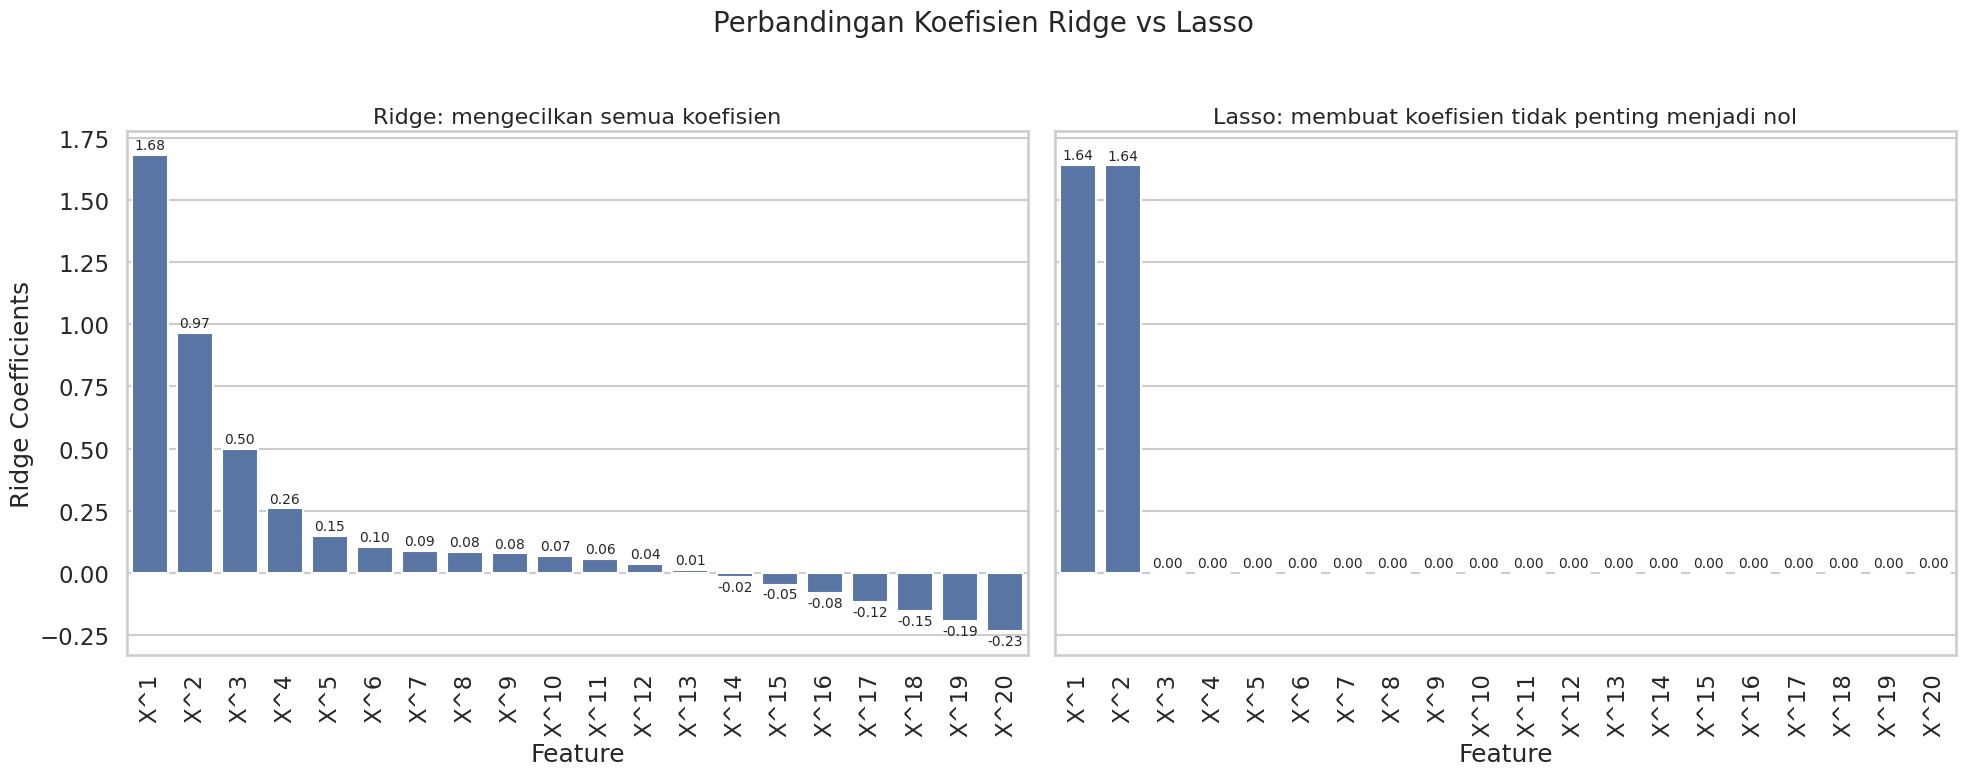

In [33]:
ridge_coeffs = ridge_model.coef_
lasso_coeffs = lasso_model.coef_

# mambuat dataframe untuk plotting
coeffs_df = pd.DataFrame({
    'Feature': [f"X^{i+1}" for i in range(X_poly_scaled.shape[1])],
    'Ridge Coefficients': ridge_coeffs,
    'Lasso Coefficients': lasso_coeffs
})

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
fig.suptitle("Perbandingan Koefisien Ridge vs Lasso", fontsize=20)

# plot ridge coefficients
barax = sns.barplot(ax=axes[0], x='Feature', y='Ridge Coefficients', data=coeffs_df)
for container in barax.containers:
    barax.bar_label(container, fontsize=10, fmt="%.2f", label_type='edge', padding=2)
axes[0].set_title("Ridge: mengecilkan semua koefisien", fontsize=16)
axes[0].tick_params(axis='x', rotation=90)

# plot lasso coefficients
barax = sns.barplot(ax=axes[1], x='Feature', y='Lasso Coefficients', data=coeffs_df)
for container in barax.containers:
    barax.bar_label(container, fontsize=10, fmt="%.2f", label_type='edge', padding=2)
axes[1].set_title("Lasso: membuat koefisien tidak penting menjadi nol", fontsize=16)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.96])

#### **Analisis Visual:**

* **Grafik Ridge (Kiri):** Perhatikan bagaimana **semua 20 fitur memiliki koefisien yang bukan nol**. Ridge telah mengecilkan besarnya koefisien (terutama untuk fitur pangkat tinggi), tetapi ia mempertahankan semua fitur dalam model.

* **Grafik Lasso (Kanan):** Hasilnya sangat berbeda! **Hanya beberapa koefisien pertama yang memiliki nilai**. Sebagian besar koefisien lainnya telah ditekan menjadi **persis nol**. Lasso telah secara efektif melakukan seleksi fitur dan memutuskan bahwa fitur-fitur dengan pangkat tinggi tidak berguna.


---
### 6. Aturan Praktis: Kapan Menggunakan yang Mana?

Berdasarkan perbandingan ini, berikut adalah panduan praktisnya:

1.  **Gunakan Ridge sebagai Default:**
    * Ridge seringkali menjadi titik awal yang baik. Ia bekerja dengan baik dalam banyak situasi dan secara komputasi sedikit lebih cepat.
    * Gunakan Ridge jika Anda memiliki alasan untuk percaya bahwa **semua (atau sebagian besar) fitur Anda memberikan kontribusi** pada hasil, bahkan jika kontribusinya kecil.

2.  **Gunakan Lasso untuk Seleksi Fitur atau Sparsity:**
    * Gunakan Lasso jika Anda berurusan dengan dataset yang memiliki **jumlah fitur yang sangat besar** (misalnya, ratusan atau ribuan).
    * Gunakan Lasso jika Anda memiliki hipotesis bahwa **hanya sebagian kecil dari fitur tersebut yang benar-benar relevan**.
    * Hasil dari Lasso (model yang *sparse* atau jarang) seringkali **lebih mudah diinterpretasikan** karena Anda hanya perlu menjelaskan beberapa fitur yang tersisa.

3.  **Bagaimana Jika Anda Tidak Yakin?**
    * Jika Anda tidak yakin, ada model hibrida yang akan kita pelajari selanjutnya.

**Selanjutnya:**
Di subchapter berikutnya, kita akan membahas **Elastic Net**, sebuah model yang menggabungkan penalti Ridge dan Lasso untuk mendapatkan yang terbaik dari kedua dunia.
